# Fast.ai CLA Lesson 1: Why are we here?
- categories: [Fast.aiCLA]

# Course Introduction
The introductory blog post can be found here https://www.fast.ai/posts/2017-07-17-num-lin-alg.html. <br>

Because machine learning is largely about manipulating data, and almost all data can be represented as a matrix, understanding linear algebra is often cited as a prerequisite to reading and understanding formal mathematical descriptions of machine learning methods, as well as creating or editing existing methods. <br>

Computational Linear Algebra is a fast.ai course covering linear algebra to be centered around practical applications and algorithms. <br>

There are four main areas for machine learning in which some linear algebra knowledge can help:
- Speed (how fast matrix multiplication occurs)
- Accuracy (how accurately can computers represent numbers)
- Memory Usage (how to efficiently store matrices)
- Scalability (how to use more data than you have the memory to store)

The reason why we are interested in these things is because often the bottleneck to a machine learning algorithm is within these four areas. In other words, knowledge in these areas can be the difference between a great ML approach and an unusable one. One example is in the case of how CNNs create their convolutional layers. While there are many mathematically equivalently orders in which to create these layers, some are evidently significantly faster. When these are applied in bulk, the optimisation makes all the difference. So in order to design or edit algorithms for usage in ML, knowledge in computational linear algebra is essential, particularly in research contexts as new approaches have not yet been optimised or implemented in existing frameworks.

# Lesson Overview
This lesson covers the basics for our four main optimisation areas: Speed, Accuracy, Memory Usage and Scalability. 

# The topics covered, briefly
- Accuracy: Number representation, Machine Epsilon, Conditioning and Stability. Approximation Accuracy.
- Memory Use: Sparse vs Dense Matrices.
- Speed: Computational Complexity, Vectorisation, Locality (Memory Usage), Scaling.

# Lecture/Notebook Notes 
There are two key types of matrix computation: Matrix and tensor products (combining matrices), and matrix decompositions (pulling them apart).

Convolutions are a special kind of matrix product, but can also be represented as a neural network where the image pixels are the start nodes, the kernel elements are the weights, and the convolution pixels end nodes.

### Accuracy

**The representation of numbers:**

On paper, fractions are infinitely written. Computers however cannot store fractions 100% precisely because they are using discrete memory to store infinite precision. We ran iterations of a function that inputs and outputs fractions. Every iteration a very small error is added, harmless for the first few. But over time, these errors result in an entirely wrong answer.

For IEEE Double precision (an agreed standard): <br>

The continuous interval between [1,2] in a computer is represented as 
$1, 1+2^{-52},1+2x2^{-52}...,2$ <br>
So in this case, we see clearly it doesn't represent infinite precision.
The smallest increment, in this case $2^{-52}$, depends on the size of the interval. For a bigger interval, [2,4], it's $2^{-51}$, bigger by a magnitude. <br>

**Machine Epsilon:**

Machine Epsilon is defined as half the distance between 1 and the next larger number. <br> 

I believe this means in the case of our [1,2] interval, $\varepsilon_{machine}=2^{-52}/2$. <br>

But the notes state:
"IEEE standards for double precision specify $\varepsilon_{machine} = 2^{-53} \approx 1.11 \times 10^{-16}$", implying that Machine Epsilon is a constant value for a machine, rather than dependent on the interval or calculation involved?

Regardless, we often describe error in terms of $\varepsilon$. 
For instance, say we represent a real number $x$ in a computer, so have a approximation $fl(x)$. The difference between $x$ and $fl(x)$ is always smaller than $x*\varepsilon$.

As an equation:
$fl(x)=x \cdot (1 + \varepsilon)$, <br>
the error is from the $x*\varepsilon$ term.

For operations in a computer, +,-,x,/: <br>
$ x \circledast y = (x * y)(1 + \varepsilon)$,<br>
the error is from all the terms containing $\varepsilon$.

**Conditioning and Stability:**

Because we can't represent numbers exactly, we need to know the errors that occur as a result. There are two defined terms to help with this:

Conditioning, about how accurately we can represent the problem. <br>
**Conditioning**: perturbation behavior of a mathematical problem (e.g. least squares)

Stability, about how accurately we can compute the answer to said problem. <br>
**Stability**: perturbation behavior of an algorithm used to solve that problem on a computer (e.g. least squares algorithms, householder, back substitution, gaussian elimination)

**"A stable algorithm gives nearly the right answer to nearly the right question."** --Trefethen

An an example for how small problems in accuracy can cause problems, consider how a small difference in matrix values results in very different eigenvalues.

In [ ]:
import numpy as np
import scipy.linalg as la 

A = np.array([[1., 1000], [0, 1]])
B = np.array([[1, 1000], [0.001, 1]])

print(A)
print(B)

wA, vrA = la.eig(A)
wB, vrB = la.eig(B)

print()
print(wA, wB)

[[   1. 1000.]
 [   0.    1.]]
[[1.e+00 1.e+03]
 [1.e-03 1.e+00]]

[1.+0.j 1.+0.j] [ 2.00000000e+00+0.j -2.08166817e-17+0.j]


Having 0.001 instead of 0 resulted in the first eigenvalue to be 2 instead of 1!

### Approximation Accuracy

Accepting some decreases in accuracy can speed up computations by orders of magnitude. So often using approximate algorithms is better. 

In ML, some errors in training data representation are actually good because they force generalisability. <br>

And sometimes we need not be super concerned about having 100% precise training data representation because the data collected isn't 100% precise in the first place.

Bloom filters can tell you a definite no, but not a definite yes, more like a probably yes. To remedy this, we can make a second more precise method to evaluate the items that are probably yes, while just ignoring the ones that are already known to be definitely no.

### Memory Use

Sparse vs Dense matrices.

Sparse storage is just storing the non-zero elements of your matrix because you know the others are just 0. There are special ways of doing sparse storage.

Dense storage is the normal way we do it when we code, we just store everything explicitly.

### Speed
The difference in speed between algorithms come from a number of areas by in particular:
- Computational Complexity
- Vectorisation
- Scaling
- Locality

**Computational complexity** and big $\mathcal{O}$ notation is about approximating the number of operations you need to do for a particular algorithm. More info: [on Interview Cake](https://www.interviewcake.com/article/java/big-o-notation-time-and-space-complexity) and [practice on Codecademy](https://www.codecademy.com/courses/big-o/0/3). 

**Vectorisation** is about applying an operation is multiple elements at once. Numpy replies on vectorized low level linear algebra APIs (BLAS and LAPACK) to do it's matrix operations. 

**Locality** is about how data in use is stored. Computers are usually slow because of the way we access data. Generally speaking, the faster the memory (so the faster we access the data), the less of it we have/the more expensive it is. Computers have many varying memory storage types, and each step down to slower memory you go, that memory is atleast an order of magnitude slower than the one before it. 

We want to minimise the time we take to retrieve data in a computation. For example, by keeping items we are going to use multiple times in a computation in fast memory, and keepings items we use rarely in slow memory.

A video to illustrate locality is then shared.

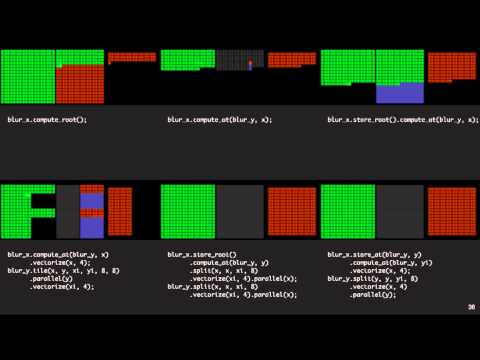

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("3uiEyEKji0M")

Code optimisation is really important. Even for a simple task, finding the average of 3 pixels, the code would normally be simple, but writing complex code would speed it up by 11x!
It's faster because it distributes work across threads (parallelism). Locality is making sure the pixels being used successively is in fast memory (cashe). W/O locality, paralleism can't be great.

We change the order in that CNN is done and as a result the way we store the pixel data, and get a much faster computational as a result.
Removing redundancy in computation also speeds up the computation.
Each computation technique has potential trade offs. For example, having redundant computation to improve locality. 

Temporaries is data stored in a temporary variable in RAM. For example in Numpy, when we compute an equation, Numpy stores each equation variable as temporaries and then retrieves it. This is slow because there's no point storing each variable in the RAM and then immediately having to use it. Simply storing these variables in the cache would be so much faster.

**Scaling:**

We we want to scale our computation across multiple cores in a computer. This is called parallesiation. Scalable algorithm are algorithms where the input can be broken into smaller pieces where each can be handled by a different core and the end result found by piecing together these pieces.

# Links

The lecture for this sessions is https://www.youtube.com/watch?v=8iGzBMboA0I&list=PLtmWHNX-gukIc92m1K0P6bIOnZb-mg0hY&index=1. <br>
The lesson resources including the notebook(s): https://github.com/fastai/numerical-linear-algebra.